In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)

In [24]:
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
data = pd.read_csv(file)

In [6]:
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [7]:
data['message'][0]

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

In [8]:
data['message'][1000].split("\n")

['Message-ID: <1081797.1075855696183.JavaMail.evans@thyme>',
 'Date: Thu, 15 Mar 2001 07:39:00 -0800 (PST)',
 'From: phillip.allen@enron.com',
 'To: stagecoachmama@hotmail.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: stagecoachmama@hotmail.com',
 'X-cc: ',
 'X-bcc: ',
 'X-Folder: \\Phillip_Allen_June2001\\Notes Folders\\All documents',
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 'Lucy,',
 '',
 'Here is the rentroll.',
 '',
 'My only questions are about #18, #25, and #37 missed rent.  Any special ',
 'reasons?',
 '',
 'It looks like there are five vacancies #2,12,20a,35,40.  If you want to run ',
 'an ad in the paper with a $50 discount that is fine.',
 'I will write you a letter of recommendation.  When do you need it?  You can ',
 'use me as a reference.  In the next two weeks we should really have a good ',
 'idea whether the sale is going through.',
 '',
 'P

In [9]:
def clean_email_text(email_text):
    
    pattern = r"Message-ID.*Content-Transfer-Encoding: 7bit"
    email_text = re.sub(pattern, "", email_text, flags=re.DOTALL)
    lines = email_text.split("\n")
    res = []

    for line in lines:
        if "X-" not in line:
            line.replace("\t"," ")
            res.append(line)
    
    return " ".join(res)

In [10]:
email_text = data['message'][5]

print(clean_email_text(email_text))

  Greg,   How about either next Tuesday or Thursday?  Phillip


In [11]:
data["processed_message"] = data['message'].apply(clean_email_text)

In [12]:
data.head()

,file,message,processed_message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes t...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [13]:
def replace_empty_string_with_Null(text):
    if text == "":
        return None
    return text

In [14]:
print(replace_empty_string_with_Null(""))

None


In [15]:
data.processed_message = data.processed_message.apply(replace_empty_string_with_Null)

In [16]:
data.head()

,file,message,processed_message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes t...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   file               517401 non-null  object
 1   message            517401 non-null  object
 2   processed_message  517395 non-null  object
dtypes: object(3)
memory usage: 11.8+ MB


In [18]:
null_values = data.processed_message.isnull()

In [19]:
data[null_values]

,file,message,processed_message
63896,dasovich-j/all_documents/4186.,Message-ID: <3778440.1075843058978.JavaMail.ev...,None
73307,dasovich-j/notes_inbox/2165.,Message-ID: <19567226.1075843168220.JavaMail.e...,None
291253,lokey-t/sandy/12.,Message-ID: <19224723.1075858976901.JavaMail.e...,None
404105,scott-s/all_documents/1118.,Message-ID: <6389475.1075846746249.JavaMail.ev...,None
406840,scott-s/discussion_threads/1382.,Message-ID: <3622191.1075846783716.JavaMail.ev...,None
408978,scott-s/notes_inbox/317.,Message-ID: <8129416.1075846794701.JavaMail.ev...,None


In [20]:
data.message[63896].split("\n")

['Message-ID: <3778440.1075843058978.JavaMail.evans@thyme>',
 'Date: Sun, 3 Dec 2000 12:30:00 -0800 (PST)',
 'From: rcavanagh@nrdc.org',
 'To: dhunter@smithandkempton.com, athomas@newenergy.com, wbooth@booth-law.com, ',
 '\tcmcintyre@sempra.com, eke@aelaw.com, smutny@iepa.com, ',
 '\tjdasovic@enron.com, fieldejr@sce.com, mflorio@turn.org, ',
 '\tbraun@cmua.org, jeflory@calpx.com',
 'Subject: Re:CESG Committee Meeting',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: RCavanagh@nrdc.org (Ralph Cavanagh)',
 'X-To: "Delaney Hunter" <dhunter@smithandkempton.com>, "Aaron Thomas (E-mail)" <athomas@newenergy.com>, "Bill Booth (E-mail)" <wbooth@booth-law.com>, "Carolyn McIntyre (E-mail)" <cmcintyre@sempra.com>, "Evelyn Elsesser (E-mail)" <eke@aelaw.com>, "Jan Smutny-Jones (E-mail)" <smutny@iepa.com>, "Jeff Dasovich (E-mail)" <jdasovic@enron.com>, "John Fielder (E-mail)" <fieldejr@sce.com>, "Mike Florio (E-mail)" <mflorio@turn.or

In [21]:
data.dropna(subset=['processed_message'], inplace = True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517395 entries, 0 to 517400
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   file               517395 non-null  object
 1   message            517395 non-null  object
 2   processed_message  517395 non-null  object
dtypes: object(3)
memory usage: 15.8+ MB


In [23]:
def remove_punctuations_and_special_characters(text):
    
# regular expressions:
#     pattern = r"[^\w\s]"
#     return re.sub(pattern, '', text)
# or we can simply use string.punctuation as 
#        ''.join(char for char in text if char not in string.punctuation)

    return re.sub(r'[^\w\s]','',text)

In [24]:
data.processed_message = data.processed_message.apply(lambda x: remove_punctuations_and_special_characters(x))

In [25]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def preprocessing_text(text):
    
    tokens = word_tokenize(text)
    
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return ' '.join(lemmatized_tokens)

In [26]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [27]:
preprocessing_text(data.processed_message[1])

'Traveling business meeting take fun trip Especially prepare presentation I would suggest holding business plan meeting take trip without formal business meeting I would even try get honest opinion whether trip even desired necessary As far business meeting I think would productive try stimulate discussion across different group working Too often presenter speaks others quiet waiting turn The meeting might better held round table discussion format My suggestion go Austin Play golf rent ski boat jet ski Flying somewhere take much time'

In [28]:
data.processed_message = data.processed_message.apply(preprocessing_text)

In [29]:
data.processed_message

0                                             Here forecast
1         Traveling business meeting take fun trip Espec...
2                                    test successful way go
3         Randy Can send schedule salary level everyone ...
4                                   Lets shoot Tuesday 1145
                                ...                        
517396    This trade OILSPECHEDGENG John Lavoratos book ...
517397    Some position Alberta Term book I send positio...
517398    2 Original Message From Doucet Dawn Sent Wedne...
517399    Analyst Rank Stephane Brodeur 1 Chad Clark 1 I...
517400    think YMCA class people recovering heartattack...
Name: processed_message, Length: 517395, dtype: object

In [30]:
def perform_textblob_sentiment(text):
    
    analysis = TextBlob(text)
    
    return analysis.sentiment.polarity

In [31]:
data["tb_score"] = data["processed_message"].apply(perform_textblob_sentiment)

In [32]:
data["tb_label"] = data["tb_score"].apply(lambda x: "Positive" if x>0 else "Negative" if x<0 else "Neutral")

In [33]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    
    scores = analyzer.polarity_scores(text)
    
    return scores['compound']

In [34]:
data["vader_intensity"] = data["processed_message"].apply(get_vader_sentiment)

In [35]:
data["vader_sentiment"] = data["vader_intensity"].apply(lambda x: "Positive" if x>0 else "Negative" if x<0 else "Neutral")

In [36]:
data.head()

,file,message,processed_message,tb_score,tb_label,vader_intensity,vader_sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here forecast,0.00,Neutral,0.0000,Neutral
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling business meeting take fun trip Espec...,0.15,Positive,0.9313,Positive
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way go,0.75,Positive,0.5859,Positive
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,Randy Can send schedule salary level everyone ...,0.00,Neutral,0.0000,Neutral
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Lets shoot Tuesday 1145,0.00,Neutral,-0.3400,Negative


In [37]:
data.to_csv("/kaggle/working/results.csv",index = False)

In [3]:
data = pd.read_csv("/kaggle/input/enron-sentiment-analysis-results/results.csv")

In [4]:
data.head()

,file,message,processed_message,tb_score,tb_label,vader_intensity,vader_sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here forecast,0.00,Neutral,0.0000,Neutral
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling business meeting take fun trip Espec...,0.15,Positive,0.9313,Positive
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way go,0.75,Positive,0.5859,Positive
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,Randy Can send schedule salary level everyone ...,0.00,Neutral,0.0000,Neutral
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Lets shoot Tuesday 1145,0.00,Neutral,-0.3400,Negative


In [6]:
data.describe()

,tb_score,vader_intensity
count,517395.000000,517395.000000
mean,0.092320,0.598296
std,0.152551,0.459930
min,-1.000000,-1.000000
25%,0.000000,0.340000
50%,0.081389,0.802000
75%,0.166667,0.959000
max,1.000000,1.000000


<AxesSubplot:ylabel='tb_label'>

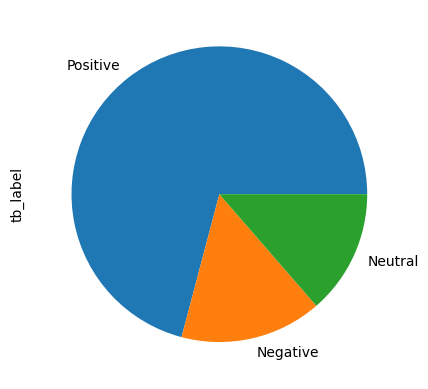

In [6]:
data.tb_label.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='vader_sentiment'>

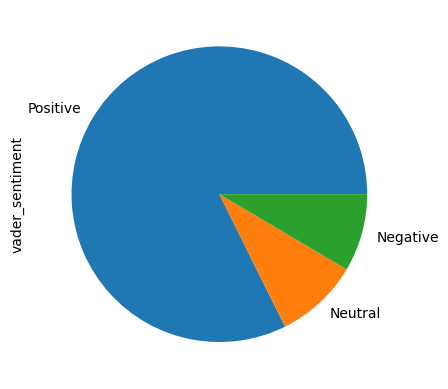

In [7]:
data.vader_sentiment.value_counts().plot(kind='pie')

In [8]:
from sklearn.metrics import accuracy_score

tb_accuracy = accuracy_score(data["tb_label"], data["vader_sentiment"])
print(f'TextBlob Accuracy: {tb_accuracy:.2%}')

vader_accuracy = accuracy_score(data["vader_sentiment"],data["tb_label"])
print(f'Vader Accuracy: {vader_accuracy:.2%}')

TextBlob Accuracy: 75.41%
Vader Accuracy: 75.41%


In [9]:
print(data["message"][1000])

Message-ID: <1081797.1075855696183.JavaMail.evans@thyme>
Date: Thu, 15 Mar 2001 07:39:00 -0800 (PST)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: stagecoachmama@hotmail.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_June2001\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,

Here is the rentroll.

My only questions are about #18, #25, and #37 missed rent.  Any special 
reasons?

It looks like there are five vacancies #2,12,20a,35,40.  If you want to run 
an ad in the paper with a $50 discount that is fine.
I will write you a letter of recommendation.  When do you need it?  You can 
use me as a reference.  In the next two weeks we should really have a good 
idea whether the sale is going through.

Phillip


In [45]:
def extract_day_date(text):
    pattern = r'(\w{3}), (\d{1,2}) (\w{3}) (\d{4})'
    match = re.search(pattern, text)
    day = match.group(1)
    month = match.group(3)
    year = match.group(4)
    return day, year

extract_day_date(data["message"][0])

('Mon', '2001')

In [46]:
data["day"], data["year"] = zip(*data["message"].apply(extract_day_date).tolist())

In [47]:
data.head()

,file,message,processed_message,tb_score,tb_label,vader_intensity,vader_sentiment,day,month_year,year
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here forecast,0.00,Neutral,0.0000,Neutral,Mon,May 2001,2001
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling business meeting take fun trip Espec...,0.15,Positive,0.9313,Positive,Fri,May 2001,2001
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way go,0.75,Positive,0.5859,Positive,Wed,Oct 2000,2000
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,Randy Can send schedule salary level everyone ...,0.00,Neutral,0.0000,Neutral,Mon,Oct 2000,2000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Lets shoot Tuesday 1145,0.00,Neutral,-0.3400,Negative,Thu,Aug 2000,2000


Text(0.5, 1.0, 'Enron Sentiment Analysis')

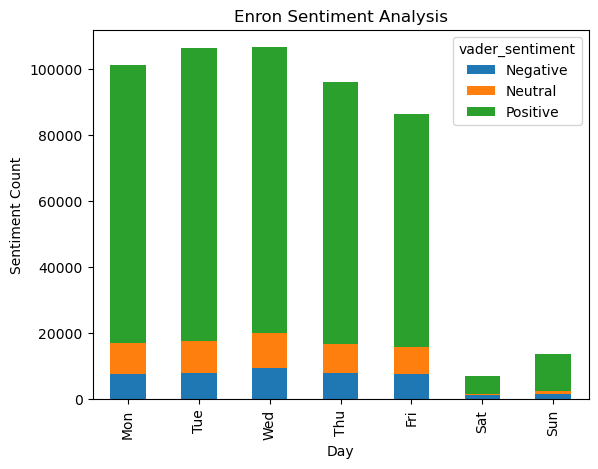

In [87]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
data['day'] = pd.Categorical(data['day'], categories=days, ordered=True)

grouped = data.groupby(['day', 'vader_sentiment'])['vader_sentiment'].count().unstack()

grouped.plot(kind='bar', stacked=True)

plt.xlabel('Day')
plt.ylabel('Sentiment Count')
plt.title('Enron Sentiment Analysis')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517395 entries, 0 to 517394
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   file               517395 non-null  object  
 1   message            517395 non-null  object  
 2   processed_message  517219 non-null  object  
 3   tb_score           517395 non-null  float64 
 4   tb_label           517395 non-null  object  
 5   vader_intensity    517395 non-null  float64 
 6   vader_sentiment    517395 non-null  object  
 7   day                517395 non-null  category
 8   month_year         517395 non-null  object  
 9   year               517395 non-null  object  
dtypes: category(1), float64(2), object(7)
memory usage: 36.0+ MB


In [70]:
year_counts = data["year"].value_counts()
data_filtered = data[data['year'].isin(year_counts[year_counts > 1000].index)]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515905 entries, 0 to 517394
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   file               515905 non-null  object  
 1   message            515905 non-null  object  
 2   processed_message  515729 non-null  object  
 3   tb_score           515905 non-null  float64 
 4   tb_label           515905 non-null  object  
 5   vader_intensity    515905 non-null  float64 
 6   vader_sentiment    515905 non-null  object  
 7   day                515905 non-null  category
 8   month_year         515905 non-null  object  
 9   year               515905 non-null  object  
dtypes: category(1), float64(2), object(7)
memory usage: 39.9+ MB


In [74]:
sentiment_counts = data_filtered.groupby(['year','vader_sentiment'])['vader_intensity'].count().reset_index()

In [76]:
sentiment_counts.year.unique()

array(['1999', '2000', '2001', '2002'], dtype=object)

Text(0.5, 1.0, 'Enron Sentiment Analysis')

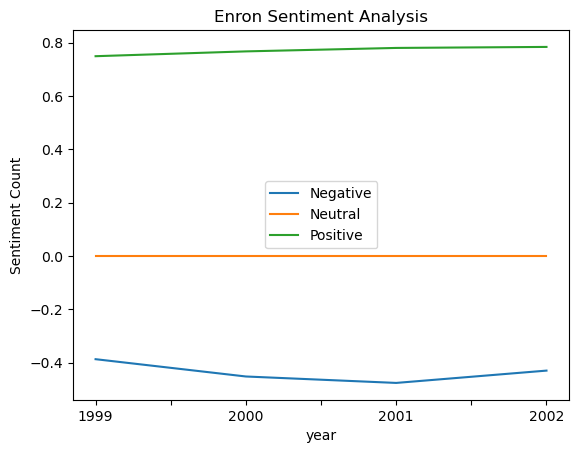

In [93]:
# years = ['1999','2000','2001','2002']
# data_filtered['day'] = pd.Categorical(data_filtered['day'], categories=years, ordered=True)

# group by 'day' and 'vader_sentiment' columns and unstack
grouped = data_filtered.groupby(['year', 'vader_sentiment'])['vader_intensity'].mean().unstack()

# plot the stacked bar chart
grouped.plot(kind='line', stacked=True)

# set the x and y axis labels and the chart title
plt.xlabel('year')
plt.ylabel('Sentiment Count')
plt.legend(loc='center')
plt.title('Enron Sentiment Analysis')